In [ ]:
from fastai.vision.all import *
import gc

In [ ]:
PATH = "/content/extracted_files"
TRAIN_PATH = "multilabel-train.csv"
TEST_PATH = "multilabel-test.csv"
CLASSES_PATH = "attribute-classes.txt"

In [ ]:
train_df = pd.read_csv(TRAIN_PATH)
train_df.head()

image_name               labels  \
0  img\Sheer_Pleated-Front_Blouse\img_00000002.jpg        pleated,sheer   
1  img\Sheer_Pleated-Front_Blouse\img_00000003.jpg         chic,pleated   
2  img\Sheer_Pleated-Front_Blouse\img_00000006.jpg              pleated   
3  img\Sheer_Pleated-Front_Blouse\img_00000009.jpg  sheer,sophisticated   
4  img\Sheer_Pleated-Front_Blouse\img_00000010.jpg  relaxed,sheer,woven   

   is_valid  
0       0.0  
1       1.0  
2       1.0  
3       0.0  
4       0.0

In [ ]:
import gdown

file_id = '1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'file.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK
From (redirected): https://drive.google.com/uc?id=1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK&confirm=t&uuid=9d4ef156-cb3a-4e17-a919-e1270fc60ba7
To: /content/file.zip
100%|██████████| 2.68G/2.68G [00:41<00:00, 64.5MB/s]


'file.zip'

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('file.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')

In [ ]:
def get_x(r): return PATH+ '/' + r['image_name'].replace('\\', '/')
def get_y(r): return r['labels'].split(',')

In [ ]:
def splitter(df):
    train = df.index[df['is_valid']==0].tolist()
    valid = df.index[df['is_valid']==1].tolist()
    return train,valid

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y=get_y,
                   item_tfms=RandomResizedCrop(224, min_scale=0.8),
                   batch_tfms=aug_transforms())

dls = dblock.dataloaders(train_df, num_workers=0)

In [ ]:
dls.show_batch(nrows=1, ncols=6)

In [ ]:
dsets = dblock.datasets(train_df)

In [ ]:
dsets.train[0]

(PILImage mode=RGB size=205x300,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [ ]:
number_of_classes = len(dsets.train[0][1])
fake_prediction = torch.tensor([[0.0] * number_of_classes])
fake_prediction

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [ ]:
target = dsets.train[0][1].reshape(1,-1)
accuracy_multi(fake_prediction, target,  thresh=0.5, sigmoid=True)

TensorMultiCategory(0.9796)

In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(fake_prediction, target, beta=2, average='samples')

0.0

In [ ]:
import random
random_list = [0.0]*int(number_of_classes/2) + [1.0]*int(number_of_classes/2)
random.shuffle(random_list)
fake_prediction = torch.tensor([random_list])
fake_prediction

tensor([[1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
         1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
         0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
         1., 0., 0., 0., 1., 1., 0., 0.]])

In [ ]:
fbeta_score(fake_prediction, target, beta=2, average='samples')

0.025252525252525252

In [ ]:
fbeta_score(target, target, beta=2, average='samples')

1.0

In [ ]:
dsets.train[0]

(PILImage mode=RGB size=205x300,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
dls.vocab

['abstract-print', 'animal', 'baroque', 'basic', 'beach', 'bird-print', 'boho', 'botanical-print', 'camouflage', 'cargo', 'chic', 'chiffon', 'circle', 'civil', 'colorblock', 'cotton', 'cozy', 'crochet', 'cute', 'denim', 'dotted', 'elegant', 'everyday', 'fancy', 'faux-fur', 'faux-leather', 'faux-suede', 'feather', 'floral', 'fur', 'glitter', 'graphic', 'grid-print', 'grunge', 'knotted', 'leaf-print', 'leather', 'leopard-print', 'linen', 'linen-blend', 'logo', 'luxe', 'marble-print', 'medallion-print', 'mesh', 'metallic', 'mixed-print', 'multi-stripe', 'neon', 'neoprene', 'nets', 'netted', 'nylon', 'oil', 'ombre', 'organza', 'ornate-print', 'paisley-print', 'palm-print', 'party', 'patched', 'pattern', 'pleated', 'print', 'relaxed', 'retro', 'safari', 'sateen', 'satin', 'sheer', 'smart', 'soft', 'solid', 'sophisticated', 'sparkling', 'sporty', 'springs', 'square', 'star', 'strap', 'stretch', 'striped', 'suede', 'summer', 'sweet', 'textured', 'thermal', 'tie-dye', 'training', 'triangle', '

In [ ]:
dls.show_batch(nrows=1, ncols=6)

In [ ]:
class LabelSmoothingBCEWithLogitsLossFlat(BCEWithLogitsLossFlat):
    def __init__(self, eps:float=0.1, **kwargs):
        self.eps = eps
        super().__init__(thresh=0.2, **kwargs)

    def __call__(self, inp, targ, **kwargs):
        # https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/166833#929222
        targ_smooth = targ.float() * (1. - self.eps) + 0.5 * self.eps
        return super().__call__(inp, targ_smooth, **kwargs)

    def __repr__(self):
        return "FlattenedLoss of LabelSmoothingBCEWithLogits()"

In [ ]:
metrics=[FBetaMulti(2.0, 0.2, average='samples'), partial(accuracy_multi, thresh=0.2)]

In [ ]:
wd      = 5e-7 #weight decay parameter
opt_func = partial(ranger, wd=wd)

In [ ]:
learn = cnn_learner(dls, resnet34, loss_func=BCEWithLogitsLossFlat(thresh=0.2),
            metrics=metrics, opt_func=opt_func).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 201MB/s]


In [ ]:
learn.fine_tune(2)

In [ ]:
learn.save('/content/fashion_recognition')

Path('/content/fashion_recognition.pth')

In [ ]:
learn = cnn_learner(dls, resnet34, loss_func=LabelSmoothingBCEWithLogitsLossFlat(),
            metrics=metrics, opt_func=opt_func).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
learn.fine_tune(2)
learn.save('/content/atr-recognition-stage-1-resnet34')

Path('/content/atr-recognition-stage-1-resnet34.pth')

In [ ]:


!cp '/content/atr-recognition-stage-1-resnet34.pth' '/content/drive/My Drive/'


SuggestedLRs(valley=0.0002290867705596611)

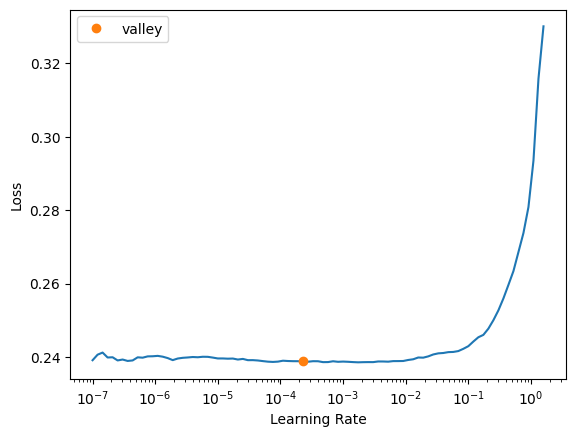

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(8, lr_max=slice(5e-7, 1e-4))

In [ ]:
learn.save('/content/atr-recognition-stage-2-resnet34')

Path('/content/atr-recognition-stage-2-resnet34.pth')

In [ ]:
!cp '/content/atr-recognition-stage-2-resnet34.pth' '/content/drive/My Drive/'

In [ ]:
learn.recorder.plot_loss()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

In [ ]:


modelname = learn.model
modelname.cpu()
torch.save(modelname, '/content/atr-recognition-stage-2-resnet34.pkl')

with open(PATH+CLASSES_PATH, 'w') as f:
    for item in dls.vocab:
        f.write("%s\n" % item)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [ ]:
learn.show_results()

In [ ]:
test_df = pd.read_csv(TEST_PATH)
test_df.head()

image_name           labels
0  img\Sheer_Pleated-Front_Blouse\img_00000005.jpg  feather,pleated
1  img\Sheer_Pleated-Front_Blouse\img_00000007.jpg    pleated,sheer
2  img\Sheer_Pleated-Front_Blouse\img_00000013.jpg            sheer
3  img\Sheer_Pleated-Front_Blouse\img_00000019.jpg          pleated
4  img\Sheer_Pleated-Front_Blouse\img_00000020.jpg            sheer

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x,
                   get_y=get_y,
                   item_tfms=Resize(224)) # Not Sure)

test_dls = dblock.dataloaders(test_df, num_workers=0)

In [ ]:
test_dls.show_batch(nrows=1, ncols=6)

In [ ]:
learn.data = test_dls
learn.validate()

(#3) [0.2320980727672577,0.32988322274609844,0.9825374484062195]

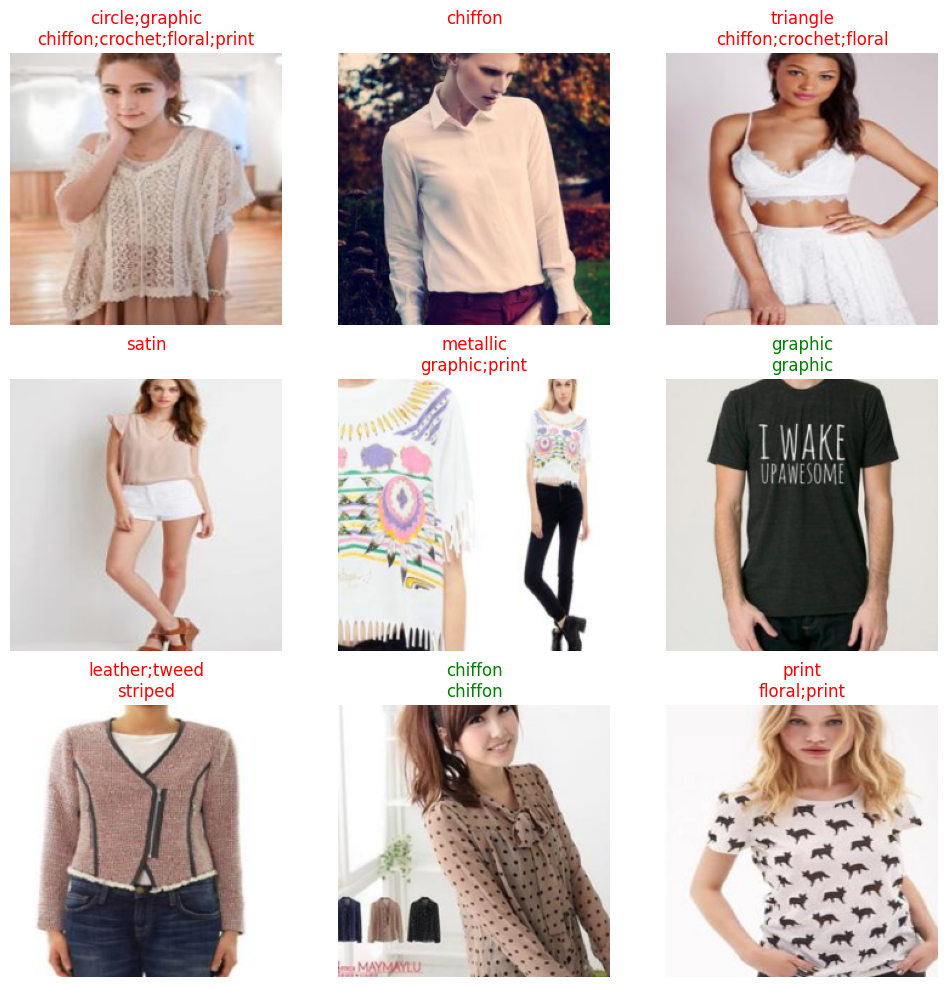

In [ ]:
learn.show_results(figsize=(12,12))

In [ ]:
def predict_attribute(model, path, display_img=True):
    predicted = model.predict(path)
    if display_img:
        size = 244,244
        img=Image.open(path)
        img.thumbnail(size,Image.ANTIALIAS)
        display(img)
    return predicted[0]

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


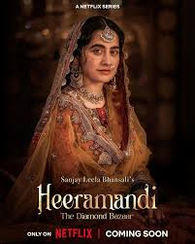

(#2) ['floral','print']

In [ ]:
image_path = '/content/heeramandi2.jpeg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


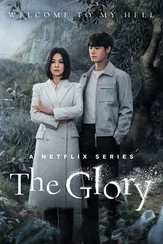

(#1) ['denim']

In [ ]:
image_path = '/content/outfit5.jpg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


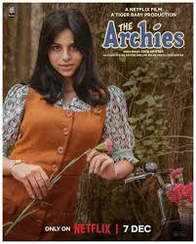

(#2) ['floral','print']

In [ ]:
image_path = '/content/archies.jpeg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


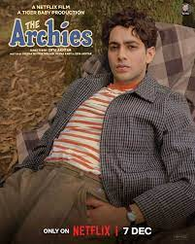

(#1) ['striped']

In [ ]:
image_path = '/content/archies2.jpeg'
predict_attribute(learn, image_path)

In [ ]:
image_path = '/content/archies4.jpg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


(#3) ['denim','faux-leather','leather']

In [ ]:
image_path = '/content/wednesday2.jpg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


(#3) ['chiffon','floral','print']

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


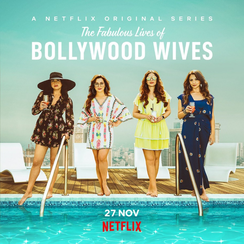

(#1) ['print']

In [ ]:
image_path = '/content/bollywood.jpg'
predict_attribute(learn, image_path)

In [ ]:
image_path = '/content/wednesday4.jpg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


(#2) ['chiffon','print']

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


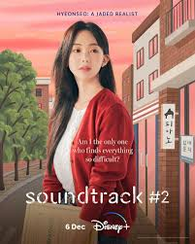

(#1) ['graphic']

In [ ]:
image_path ='/content/soundtrack.jpeg'
predict_attribute(learn, image_path)

<ipython-input-50-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


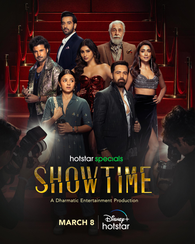

(#1) ['graphic']

In [ ]:
image_path ='/content/showtime2.jpg'
predict_attribute(learn, image_path)

In [ ]:
learn = cnn_learner(dls, resnet34, loss_func=BCEWithLogitsLossFlat(thresh=0.2),
            metrics=metrics, opt_func=opt_func).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 50.7MB/s]


In [ ]:
file_id = '1oQ3kcw8v7ocZUCHaGzPDjCKDq3ex9bri'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'stage1.pth', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1oQ3kcw8v7ocZUCHaGzPDjCKDq3ex9bri
From (redirected): https://drive.google.com/uc?id=1oQ3kcw8v7ocZUCHaGzPDjCKDq3ex9bri&confirm=t&uuid=4d856684-30af-4f07-9730-1cca8b4735e0
To: /content/stage1.pth
100%|██████████| 350M/350M [00:08<00:00, 41.1MB/s]


'stage1.pth'

In [ ]:
learn.load('/content/stage1')

In [ ]:
file_id = '1-1mS53-8oa18I7V2nxujpRBezNd2sKoR'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'stage2.pth', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-1mS53-8oa18I7V2nxujpRBezNd2sKoR
From (redirected): https://drive.google.com/uc?id=1-1mS53-8oa18I7V2nxujpRBezNd2sKoR&confirm=t&uuid=4a489e82-a914-4beb-a49e-12929035ffbc
To: /content/stage2.pth
100%|██████████| 350M/350M [00:12<00:00, 28.7MB/s]


'stage2.pth'

In [ ]:
learn.load('/content/stage2')

In [ ]:
learn.export('/content/type_recognition2.pkl')

In [ ]:
!cp '/content/type_recognition2.pkl' '/content/drive/My Drive/'

In [ ]:

modelname = learn.model
modelname.cpu()
torch.save(modelname, '/content/fashion_recognition.pkl')

with open(PATH+CLASSES_PATH, 'w') as f:
    for item in dls.vocab:
        f.write("%s\n" % item)

In [ ]:
!cp '/content/fashion_recognition.pkl' '/content/drive/My Drive/'

In [ ]:
def predict_attribute(model, path, display_img=True):
    predicted = model.predict(path)
    if display_img:
        size = 244,244
        img=Image.open(path)
        img.thumbnail(size,Image.ANTIALIAS)
        display(img)
    return predicted[0]

<ipython-input-38-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


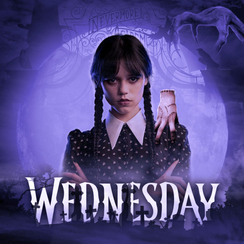

(#2) ['chiffon','print']

In [ ]:
image_path = '/content/wednesday4.jpg'
predict_attribute(learn, image_path)